In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')



In [2]:
#Loading the dataset
Asthma_Disease = pd.read_csv("asthma_disease_data.csv")

In [3]:
#Printing out the first 5 rows
Asthma_Disease.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [4]:
Asthma_Disease.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid
2391,7425,26,1,0,0,28.123021,1,1.613138,7.412878,8.512253,...,2.280613,2.453284,1,1,0,0,1,0,0,Dr_Confid


In [5]:
Asthma_Disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [6]:
Asthma_Disease.shape

(2392, 29)

In [7]:
#the uniqueness of Diagnosis
pd.unique(Asthma_Disease['Diagnosis'])

array([0, 1], dtype=int64)

In [8]:
#Generating the summary statistics for numerical and categorical features
Asthma_Disease.describe(include='all')


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dr_Confid
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2392
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839,NaN
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749,NaN
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN


In [9]:
Asthma_Disease.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PatientID,2392.0,6229.500000,690.655244,5034.000000,5631.750000,6229.500000,6827.250000,7425.000000
Age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
Gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalActivity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235


In [10]:
#Checking for missing values
missing_values = Asthma_Disease.isnull().sum()
missing_values


PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [11]:
Asthma_Disease['DoctorInCharge'].unique()

array(['Dr_Confid'], dtype=object)

In [12]:
Asthma_Disease = Asthma_Disease.drop(['DoctorInCharge'], axis=1)
Asthma_Disease

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,0,3.470589,3.067944,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,0,3.125249,5.166032,0,1,0,0,0,1,1
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,0,1.132977,5.509502,0,0,0,1,1,0,1
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,0,1.685962,3.346877,1,0,1,1,0,1,1
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,1,3.481549,1.713274,0,1,1,0,1,1,0


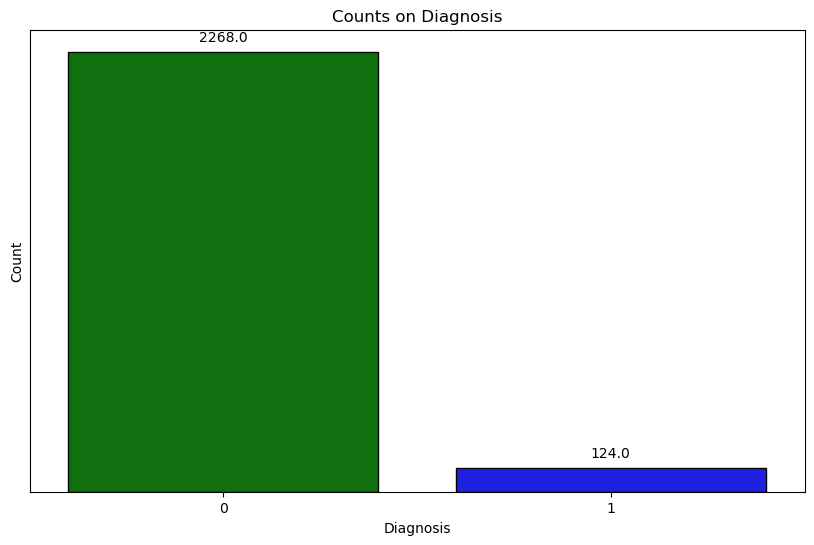

In [57]:
#Visualizing data on Diagnosis
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Diagnosis', data=Asthma_Disease, palette=['green','blue'], edgecolor='black')
plt.title('Counts on Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
ax.set_yticks([])
#Data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',xytext=(0,10), textcoords='offset points')
    
plt.show()

### The above visualization tells those who were diagnosed with Asthma were less, than those who were not diagnosed with Asthma.

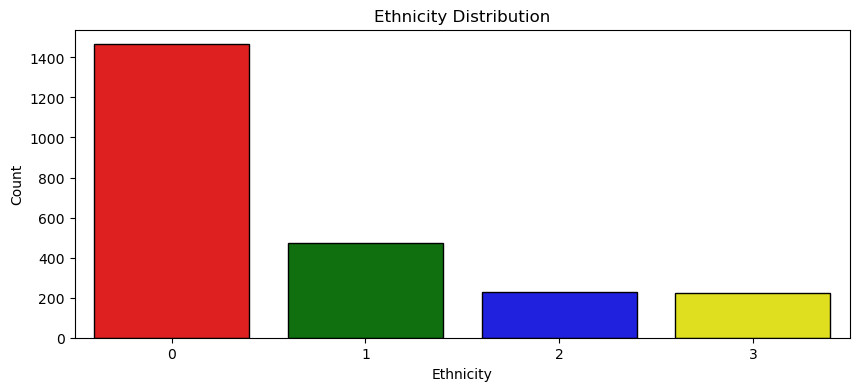

In [15]:
#Countplot on the Ethnicity
plt.figure(figsize=(10,4))
sns.countplot(x='Ethnicity',data=Asthma_Disease, palette=['red','green', 'blue', 'yellow'],edgecolor='black')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

**The above distribution tells the Ethnicity Patients coded us 0 to be Caucasian ethnicity, 1 as the African American, 2 as the Asian Etnicity and lastly 3 representing the Other Ethnicity. Therefore this above visualization shows that the Caucasian Ethnicity are largest**

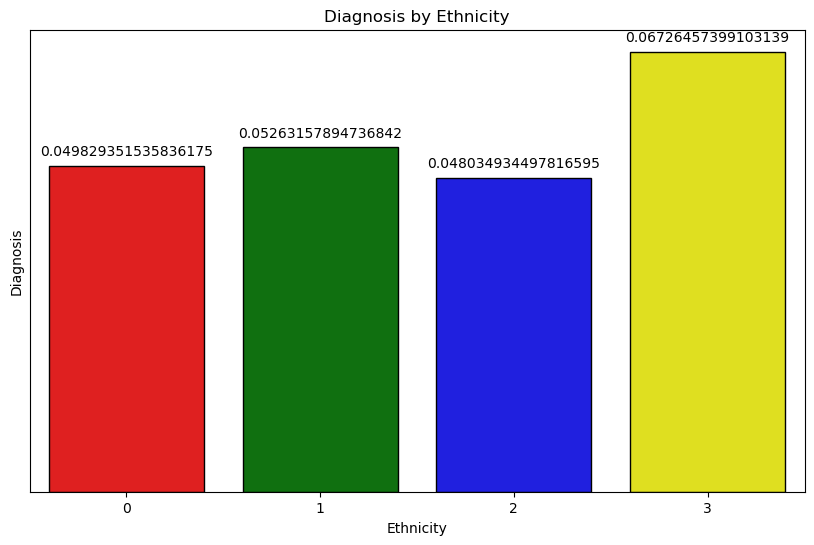

<Figure size 640x480 with 0 Axes>

In [17]:
#Diagnosis by Ethnicity
#Barplot
plt.figure(figsize=(10,6))
ax= sns.barplot(x='Ethnicity',y='Diagnosis', data=Asthma_Disease, palette=['red','green','blue','yellow'],edgecolor='black',ci=None)
plt.title('Diagnosis by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Diagnosis')
ax.set_yticks([])
#Data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',xytext=(0,10), textcoords='offset points')
    
plt.show()
plt.tight_layout()

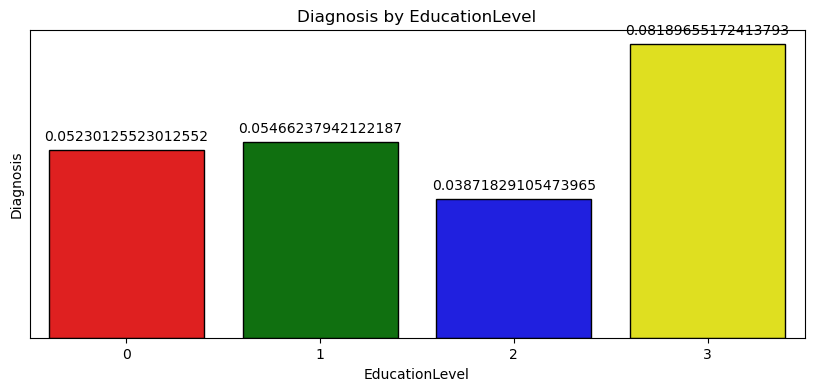

In [18]:
#Diagnosis by EducationLevel
#Barplot
plt.figure(figsize=(10,4))
ax= sns.barplot(x='EducationLevel',y='Diagnosis', data=Asthma_Disease, palette=['red','green','blue','yellow'],edgecolor='black',ci=None)
plt.title('Diagnosis by EducationLevel')
plt.xlabel('EducationLevel')
plt.ylabel('Diagnosis')
ax.set_yticks([])
#Add data label
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',xytext=(0,10), textcoords='offset points')
    
plt.show()

 **The above graph shows that, those with higher education were diagnosed to have Asthma_Disease, followed by the High School graduates,then those without No education level, and lastly those with Bachelors.**

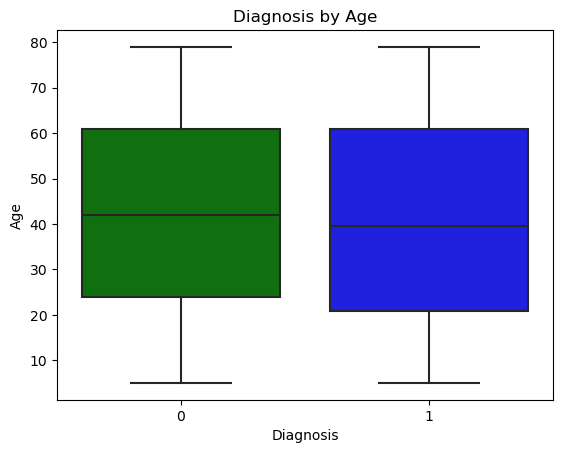

In [20]:
#Diagnosis by Age
#Boxplots
sns.boxplot(x='Diagnosis',y='Age',data=Asthma_Disease, palette=['green', 'blue'])
plt.title('Diagnosis by Age')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.show()

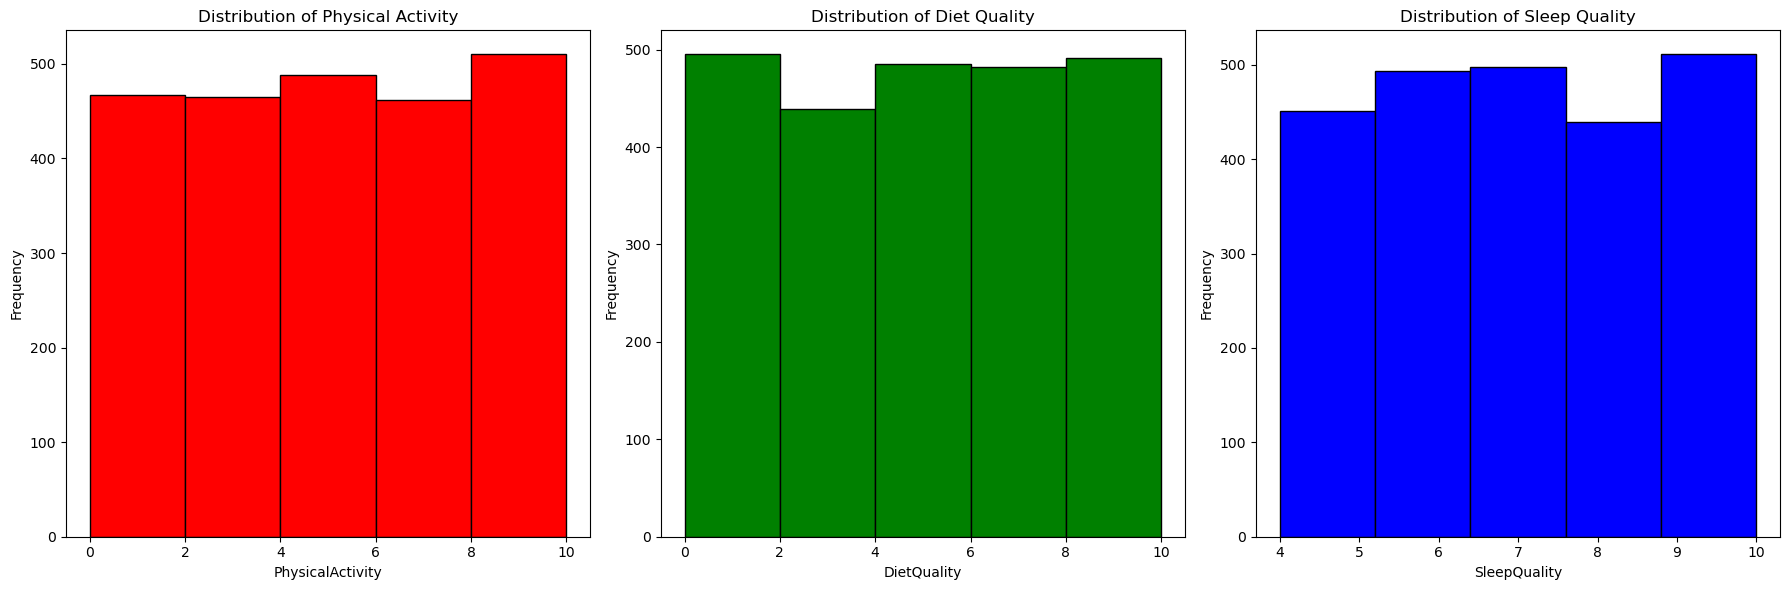

In [59]:
#Distribution of Histograms
plt.figure(figsize = (18,6))

#Dividing it into subplot
plt.subplot(1, 3, 1)
#histogram distribution of PhysicalActivity
plt.hist(Asthma_Disease["PhysicalActivity"], bins =5, color ="red", edgecolor= "black")
plt.title("Distribution of Physical Activity")
plt.xlabel("PhysicalActivity")
plt.ylabel("Frequency")
#plt.show()


#histogram distribution of DietQuality
plt.subplot(1, 3, 2)
plt.hist(Asthma_Disease["DietQuality"], bins =5, color ="green", edgecolor= "black")
plt.title("Distribution of Diet Quality")
plt.xlabel("DietQuality")
plt.ylabel("Frequency")
#plt.show()      

#histogram distribution of SleepQuality
plt.subplot(1, 3, 3)
plt.hist(Asthma_Disease["SleepQuality"], bins =5, color ="blue", edgecolor= "black")
plt.title("Distribution of Sleep Quality")
plt.xlabel("SleepQuality")
plt.ylabel("Frequency")

plt.tight_layout()


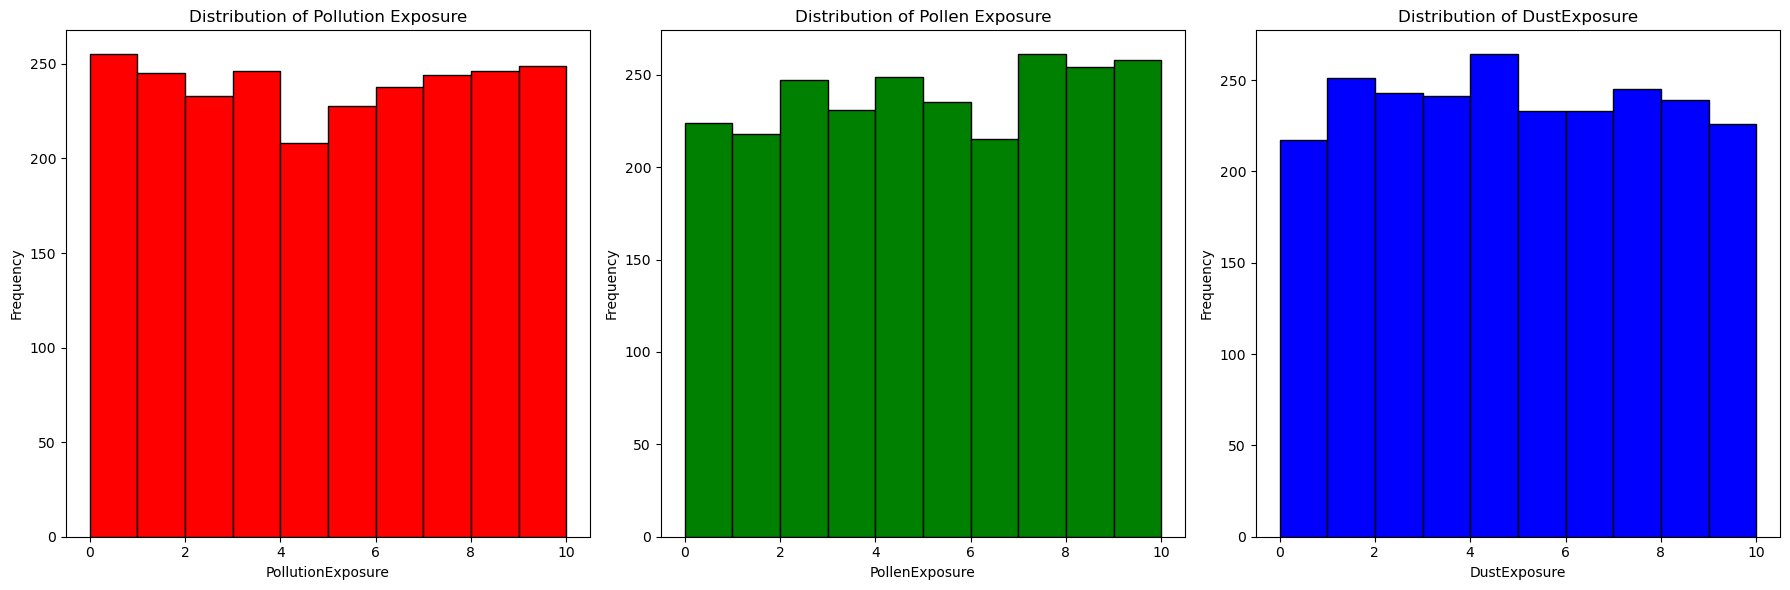

In [22]:
#Distribution of Histograms
plt.figure(figsize = (18,6))

#Dividing it into subplot
plt.subplot(1, 3, 1)
#histogram distribution of PollutionExposure
plt.hist(Asthma_Disease["PollutionExposure"], bins =10, color ="red", edgecolor= "black")
plt.title("Distribution of Pollution Exposure")
plt.xlabel("PollutionExposure")
plt.ylabel("Frequency")
#plt.show()


#histogram distribution of PollenExposure
plt.subplot(1, 3, 2)
plt.hist(Asthma_Disease["PollenExposure"], bins =10, color ="green", edgecolor= "black")
plt.title("Distribution of Pollen Exposure")
plt.xlabel("PollenExposure")
plt.ylabel("Frequency")
#plt.show()      

#histogram distribution of DustExposure
plt.subplot(1, 3, 3)
plt.hist(Asthma_Disease["DustExposure"], bins =10, color ="blue", edgecolor= "black")
plt.title("Distribution of DustExposure")
plt.xlabel("DustExposure")
plt.ylabel("Frequency")

plt.tight_layout()

In [23]:
duplicates = Asthma_Disease[Asthma_Disease.duplicated()]
duplicates

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis


In [24]:
#Defining features and target variable
feature =Asthma_Disease.drop(columns =['Diagnosis'])
target =Asthma_Disease['Diagnosis']

In [25]:
#Splitting data into training and testing sets
X_train,X_test, y_train,y_test = train_test_split(feature, target, test_size=0.3, random_state=42)

In [26]:
#Build and train the Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
#Evaluating the model
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

Confusion Matrix:
 [[678   3]
 [ 37   0]]
ROC AUC Score: 0.66
Accuracy: 94.0%


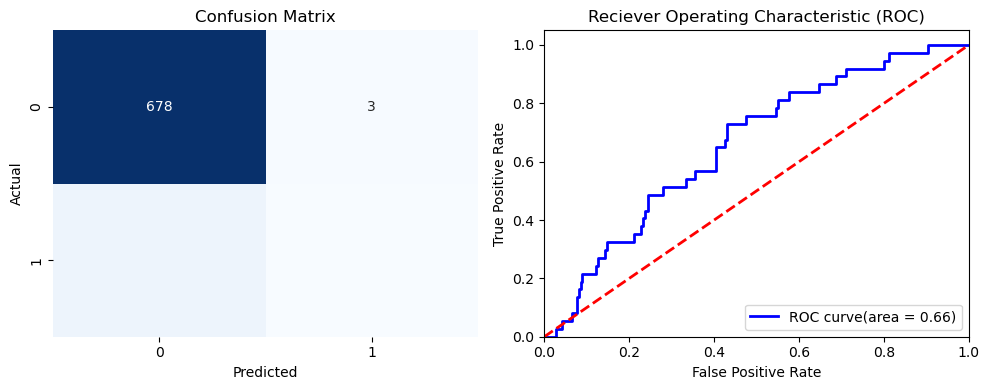

In [28]:
#Prediction of the test set and visualize it
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("Accuracy:", str(round(accuracy, 2) * 100) +"%")

#Plot confusion matrix
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#plot ROC Curve
plt.subplot(1,2,2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) #fpr=false positive results, tpr=true positive results
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve(area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [29]:
# Saving the model to a file
pickle_file = 'logistic_regression_model.pkl'
with open(pickle_file, 'wb') as file:
    pickle.dump(model, file)

#Load the model from the file
with open(pickle_file, 'rb') as file:
    loaded_model = pickle.load(file)

#Evaluate the model 
y_pred = loaded_model.predict(X_test)
y_pred_prob = loaded_model.predict_proba(X_test)[:,1]

#Print classsification report
classification_report_output = classification_report(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred),2)
print(accuracy)

0.94
